In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
ff_pts = pd.read_csv('../data/processed/modeling-data.csv')
# Drop non-adjusted columns
ff_pts.drop(columns = ff_pts.loc[:, 'passing_cmp':'fantasy_ppr'].columns, inplace = True)

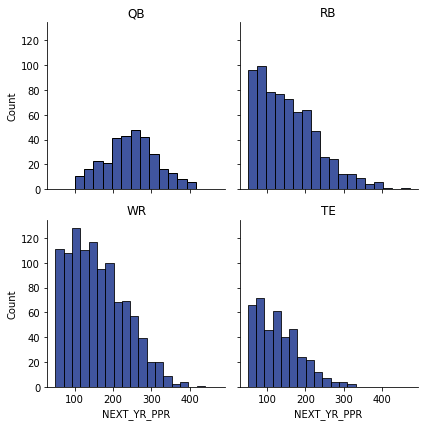

In [3]:
# Distribution of response variable by position
sns.set_palette('dark')
g = sns.FacetGrid(data = ff_pts, col = 'fantpos', col_wrap = 2, col_order = ['QB', 'RB', 'WR', 'TE'])
ax = g.map(sns.histplot, 'NEXT_YR_PPR')
axes = g.axes.flatten()
axes[0].set_title('QB')
axes[1].set_title('RB')
axes[2].set_title('WR')
axes[3].set_title('TE')
plt.show()

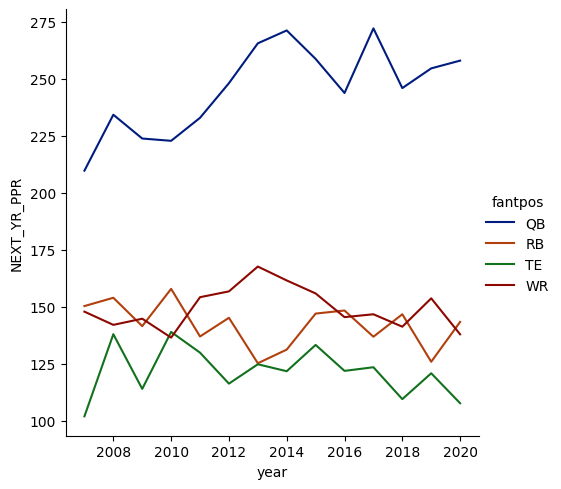

In [4]:
# Change of response variable over time by position
pos_yr_pts = ff_pts.groupby(['fantpos', 'year']).median().loc[:, 'NEXT_YR_PPR'].reset_index()
sns.relplot(data = pos_yr_pts, x = 'year', y = 'NEXT_YR_PPR', hue = 'fantpos', kind = 'line')
plt.show()